In [1]:
import numpy as np
import numba as nb
import os
import matplotlib.pyplot as plt
import spline_gstar as sg
import Num_SH_fast
import newQCDtransition as nw
import importlib

import Emma3
import Emma3


In [2]:
mixangv_e = 5.33e-10
mixangv_mu = 5.33e-10
mixangv_tau = 5.33e-10

Le0 = 0.0012
Lmu0 = 0.0012
Ltau0 = 0.0012

qcd_temp = [180*i for i in range(1, 5)]

import Emma3
par3, 0.0072751


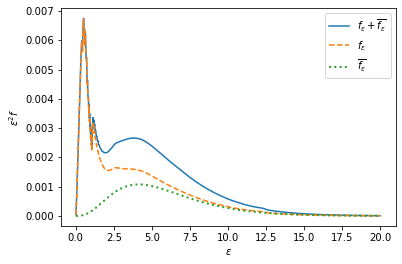

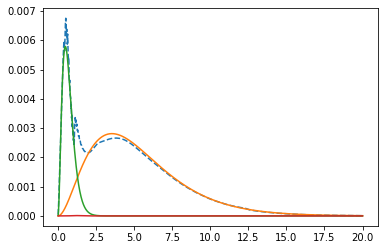

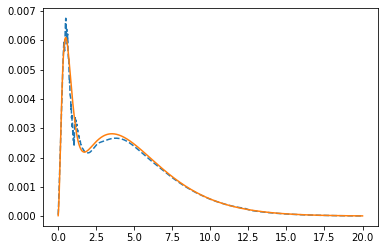

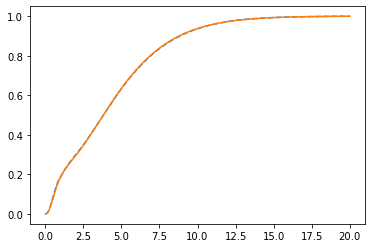

(0.06461678187232227, 73.52162182081099)
CPU times: user 1min 38s, sys: 239 ms, total: 1min 38s
Wall time: 1min 38s
import Emma3
par3, 0.004736


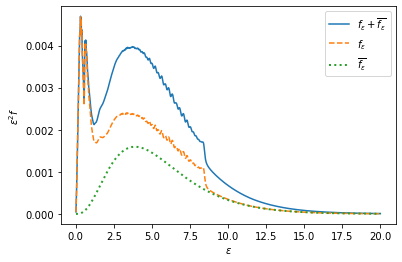

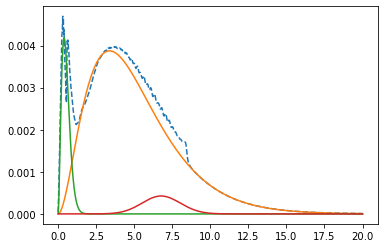

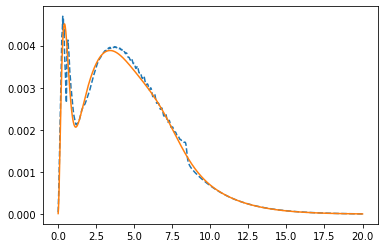

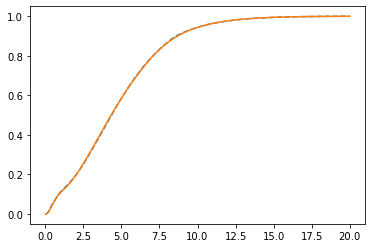

(0.08150299958280426, 48.25917254916898)
CPU times: user 1min 26s, sys: 169 ms, total: 1min 27s
Wall time: 1min 27s
import Emma3
par3, 0.011762


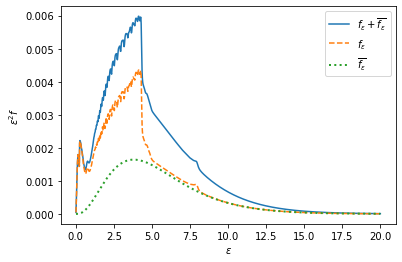

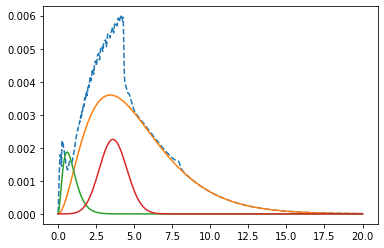

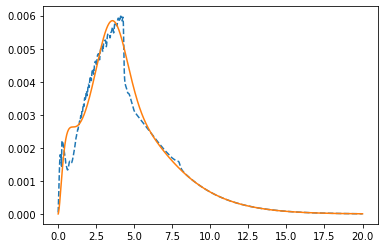

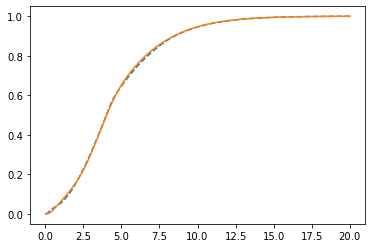

(0.08336356427347263, 47.30295308205783)
CPU times: user 1min 56s, sys: 476 ms, total: 1min 57s
Wall time: 1min 56s
import Emma3
par4, 0.010806


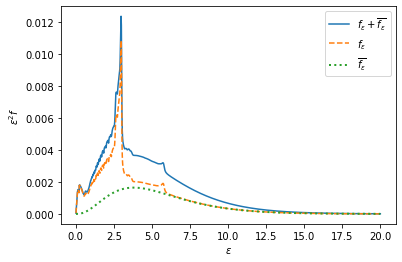

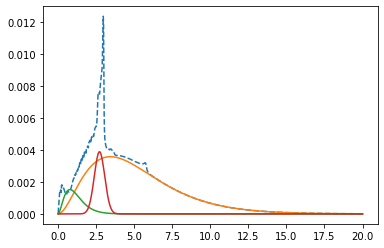

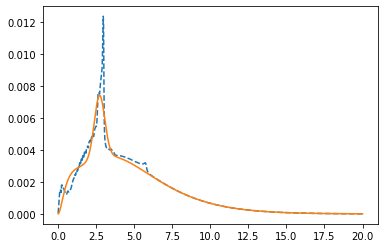

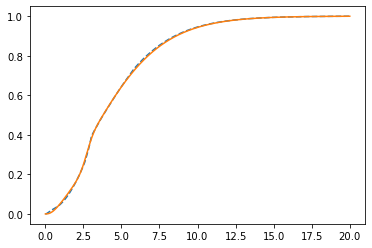

(0.08338033558290484, 48.78970892147956)
CPU times: user 4min 9s, sys: 718 ms, total: 4min 10s
Wall time: 4min 8s


In [3]:
for temp in qcd_temp:    
    
    T, g, gs = nw.new_gstar(temp, std_absolute_T=False)
    
    sg.save_spline_params(T, g, gs)
   
    importlib.reload(Num_SH_fast)
    
    file_prefix = str(temp)
   
    %time print(Num_SH_fast.solve(mixangv_e, mixangv_mu, mixangv_tau, Le0, Lmu0, Ltau0, "3to1 model", file_prefix, N=1000, make_plot=True, run_sp_again=True, run_pk_again=True))


In [4]:
import Emma3 as EH

In [5]:
data_file = np.load("3to1 model/180x1.20e-03x1.60e-09.npz", allow_pickle=True)
data_file.files

['T',
 'final_distribution',
 'epsilon',
 'lep_evo_e',
 'lep_evo_mu',
 'lep_evo_tau',
 'a',
 't',
 'sterile_evo',
 'anti_sterile_evo',
 'mass_s',
 'mixangv_tot',
 'Le0',
 'Lmu0',
 'Ltau0',
 'mixangv_e',
 'mixangv_mu',
 'mixangv_tau',
 'omega_h2',
 'total_entropy']

import Emma3
import Emma3
import Emma3
import Emma3


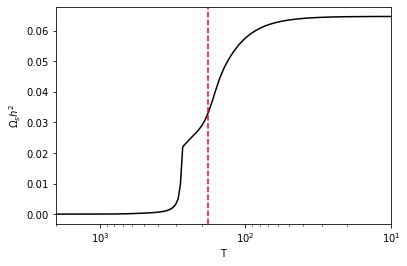

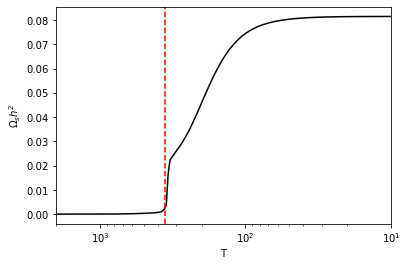

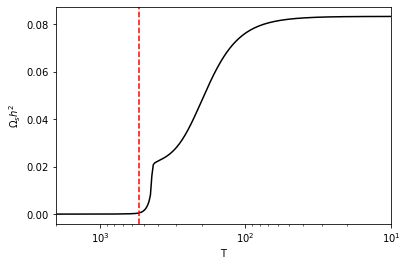

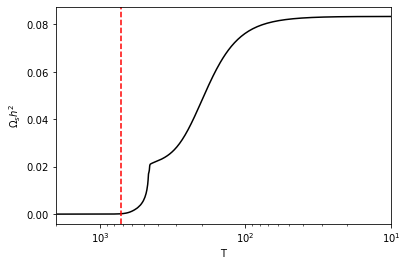

In [18]:
all_T = []
all_om = []
for temp in qcd_temp:    
    
    data_file = np.load("3to1 model/"+str(temp)+"x1.20e-03x1.60e-09.npz", allow_pickle=True)

    T, g, gs = nw.new_gstar(temp, std_absolute_T=False)

    sg.save_spline_params(T, g, gs)

    importlib.reload(Num_SH_fast)


    T = data_file['T']
    eps = data_file['epsilon']
    om = np.zeros_like(T)
    for i in range(len(om)):
        om[i] = EH.e_density(0.0071, eps, eps**2 * data_file['sterile_evo'][i], eps**2 * data_file['anti_sterile_evo'][i])
        
    plt.figure()
    plt.semilogx(T, om, c='k')
    plt.axvline(temp, c='r', ls='--')
    plt.xlim(2000,10)
    
    plt.ylabel(r'$\Omega_s h^2$')
    plt.xlabel('T')

    
    all_T.append(T)
    all_om.append(om)

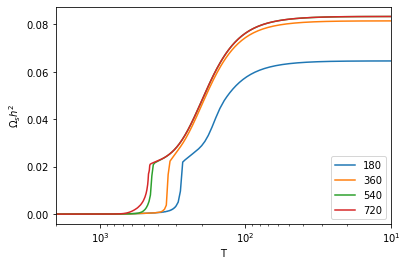

In [13]:
plt.figure()
for i in range(len(all_T)):
    plt.semilogx(all_T[i], all_om[i], label=str(qcd_temp[i]))
    
plt.xlim(2000,10)
plt.ylabel(r'$\Omega_s h^2$')
plt.xlabel('T')
plt.legend(loc='lower right')
plt.show()

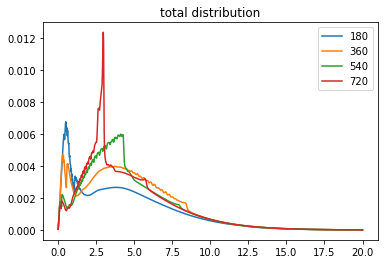

In [19]:
plt.figure()
for i in range(len(all_T)):
    data_file = np.load("3to1 model/"+str(qcd_temp[i])+"x1.20e-03x1.60e-09.npz", allow_pickle=True)
    eps = data_file['epsilon']
    plt.plot(eps, eps**2 * data_file['final_distribution'], label=str(qcd_temp[i]))
    
plt.legend(loc='upper right')
plt.title("total distribution")
plt.show()

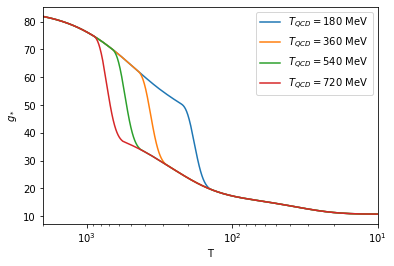

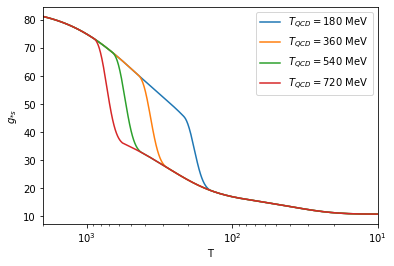

In [15]:
nw.example_plot()

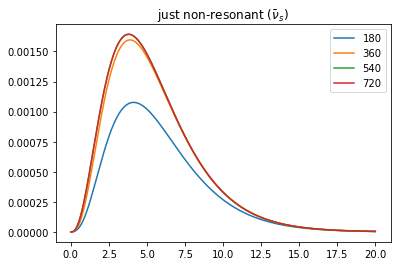

In [20]:
plt.figure()
for i in range(len(all_T)):
    data_file = np.load("3to1 model/"+str(qcd_temp[i])+"x1.20e-03x1.60e-09.npz", allow_pickle=True)
    eps = data_file['epsilon']
    plt.plot(eps, eps**2 * data_file['anti_sterile_evo'][-1], label=str(qcd_temp[i]))
    
plt.legend(loc='upper right')
plt.title(r"just non-resonant ($\bar\nu_s$)")
plt.show()

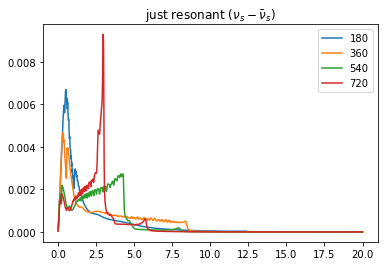

In [21]:
plt.figure()
for i in range(len(all_T)):
    data_file = np.load("3to1 model/"+str(qcd_temp[i])+"x1.20e-03x1.60e-09.npz", allow_pickle=True)
    eps = data_file['epsilon']
    plt.plot(eps, eps**2 * (data_file['sterile_evo'][-1]-data_file['anti_sterile_evo'][-1]), label=str(qcd_temp[i]))
    
plt.legend(loc='upper right')
plt.title(r"just resonant ($\nu_s - \bar\nu_s$)")
plt.show()